In [1]:
from utils import find_visits_from_ObjectId, get_an_SN_and_object, inject_visit_images, injected_data_to_sn_data, gather_host_data
import matplotlib.pyplot as plt

In [2]:
visit_info, ra, dec = find_visits_from_ObjectId(592914119179383718)
print(visit_info)

    instrument  detector          visit band   day_obs physical_filter  \
0   LSSTComCam         2  2024111700344    r  20241117            r_03   
1   LSSTComCam         2  2024111700351    z  20241117            z_03   
2   LSSTComCam         2  2024111700356    z  20241117            z_03   
3   LSSTComCam         2  2024111700357    z  20241117            z_03   
4   LSSTComCam         2  2024111700360    i  20241117            i_06   
5   LSSTComCam         2  2024111700368    r  20241117            r_03   
6   LSSTComCam         2  2024111700369    r  20241117            r_03   
7   LSSTComCam         8  2024111800097    r  20241118            r_03   
8   LSSTComCam         6  2024111800105    z  20241118            z_03   
9   LSSTComCam         2  2024111900342    r  20241119            r_03   
10  LSSTComCam         2  2024111900348    y  20241119            y_04   
11  LSSTComCam         2  2024111900349    y  20241119            y_04   
12  LSSTComCam         2  202411190035

In [3]:
visit_info = get_an_SN_and_object(visit_info.reset_index(drop=True), t0 = 60648.239039)

32


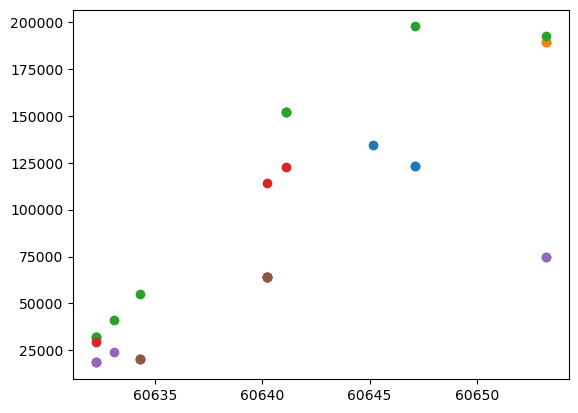

In [4]:
T = visit_info["expMidptMJD"].values
F = visit_info["flux"].values
B = visit_info["band"].values
print(len(T))
for b in ["u", "g", "r", "i", "z", "y"]:
    plt.scatter(T[B == b], F[B == b])
plt.show()

In [5]:
injected_data = inject_visit_images(visit_info, ra, dec + 2.0 / 3600)

Encountered ERROR:  
  File "src/image/Exposure.cc", line 221, in lsst::afw::image::Exposure<ImagePixelT, MaskPixelT, VariancePixelT> lsst::afw::image::Exposure<ImageT, MaskT, VarianceT>::getCutout(const lsst::geom::Point2D&, const lsst::geom::Extent2I&) const [with ImageT = float; MaskT = int; VarianceT = float; lsst::geom::Point2D = lsst::geom::Point<double, 2>; lsst::geom::Extent2I = lsst::geom::Extent<int, 2>]
    Point (-2.44672, 3707.62) lies at pixel (-2.44672, 3707.62), which lies outside Exposure Box2I(Point2I(0, 0), Extent2I(4072, 4000)) {0}
lsst::pex::exceptions::InvalidParameterError: 'Point (-2.44672, 3707.62) lies at pixel (-2.44672, 3707.62), which lies outside Exposure Box2I(Point2I(0, 0), Extent2I(4072, 4000))'



In [6]:
print(len(injected_data))

32


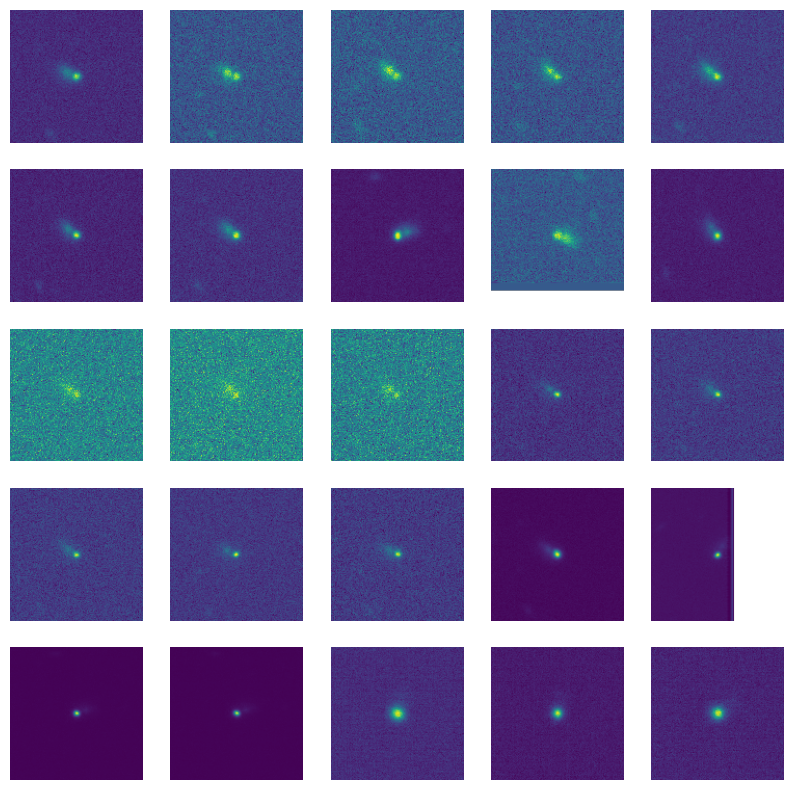

In [7]:
fig, axarr = plt.subplots(5,5, figsize=(10,10))
bump = 0
for i, ax in enumerate(axarr.flatten()):
    if injected_data[i] is None:
        bump += 1
    ax.imshow(injected_data[i+bump]["image"])
    ax.axis("off")
plt.show()

In [8]:
injected_data_to_sn_data(injected_data, ra, dec + 2.0 / 3600)

In [9]:
gather_host_data(592914119179383718, "host_data_v2.npz")

Job phase is COMPLETED

Found 1 source(s)
